# Base de entrenamiento

In [4]:
import pandas as pd

#se carga la base de train
df = pd.read_parquet('train202212_202307.parquet')

#se seleccionan las variables requeridas para entrenar el modelo
X = df[['DiasAtraso','TipoPrestamo', 'Relacion_coutasPagasPlazo', 'Relacion_pagoTotal', 'Genero', 'TipoVivienda', 'LocalizacionNegocio', 'Edad', 'EstadoCivil', 'Hijos', 'PersonasCargo','Calificacion_ult_gestion',
         'Calificacion_ult_gestion_3_meses',
       'Calificacion_ult_gestion_6_meses', 'Recuento Incumplido 3 meses',
       'Recuento Incumplido 6 meses', 'Recuento con contacto ultimos 3 meses',
       'Recuento con contacto ultimos 6 meses',
       'Recuento_sin_contacto_ultimos_3_meses',
       'Recuento_sin_contacto_ultimos_6_meses']]

#se selecciona la variable respuesta/objetivo
y = df["P_recuperacionF"]

#se realiza el one hot enconding para la variables categoricas
X_encoded = pd.get_dummies(X, columns=['TipoPrestamo', 'Genero', 'TipoVivienda', 'LocalizacionNegocio', 'EstadoCivil'], drop_first=True)

In [19]:
X_encoded

,DiasAtraso,Relacion_coutasPagasPlazo,Relacion_pagoTotal,Edad,Hijos,PersonasCargo,Calificacion_ult_gestion,Calificacion_ult_gestion_3_meses,Calificacion_ult_gestion_6_meses,Recuento Incumplido 3 meses,Recuento Incumplido 6 meses,Recuento con contacto ultimos 3 meses,Recuento con contacto ultimos 6 meses,Recuento_sin_contacto_ultimos_3_meses,Recuento_sin_contacto_ultimos_6_meses,TipoPrestamo_C,TipoPrestamo_D,TipoPrestamo_F,TipoPrestamo_M,TipoPrestamo_N,TipoPrestamo_O,TipoPrestamo_R,TipoPrestamo_S,TipoPrestamo_X,Genero_M,Genero_ND,TipoVivienda_A,TipoVivienda_F,TipoVivienda_N,TipoVivienda_O,TipoVivienda_P,LocalizacionNegocio_D,LocalizacionNegocio_I,LocalizacionNegocio_R,EstadoCivil_,EstadoCivil_A,EstadoCivil_C,EstadoCivil_D,EstadoCivil_S,EstadoCivil_V
0,0,0.500000,0.607238,45.0,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False
1,465,0.000000,1.000000,69.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
2,327,0.125000,0.871528,46.0,3,4,0.0,3.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False
3,26,0.333333,0.758507,28.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
4,2065,0.541666,0.564913,42.0,3,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230824,1944,0.541666,0.523223,32.0,0,0,0.0,4.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
230825,1915,0.458333,0.645739,37.0,1,1,0.0,3.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
230826,1398,0.555555,0.602359,58.0,1,0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False
230827,1709,0.333333,0.752852,38.0,2,0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False


In [ ]:
df.to_excel('Variable_Objetivo.xlsx')

# Grid search

In [6]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Convertimos los datos en DMatrix, que es el formato que XGBoost usa internamente
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir el modelo base XGBoost para GridSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# Definir los parámetros a probar en el GridSearch
param_grid = {
    'max_depth': [6],
    'eta': [0.05],
    'subsample': [0.9],
    'colsample_bytree': [0.7],
    'n_estimators': [100, 200, 300]  # Número de árboles
}

# # Definir los parámetros a probar en el GridSearch
# param_grid = {
#     'max_depth': [3, 4, 5, 6],
#     'eta': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'n_estimators': [100, 200, 500]  # Número de árboles
# }

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Ajustar el GridSearch a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Predecir en el conjunto de prueba con el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar el modelo con el error cuadrático medio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en conjunto de prueba: {rmse:.4f}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores parámetros encontrados:  {'colsample_bytree': 0.7, 'eta': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}
RMSE en conjunto de prueba: 0.2697


# Entrenamiento de modelo de regresión

RMSE en conjunto de prueba: 0.2696
MAE en conjunto de prueba: 0.1540
R² en conjunto de prueba: 0.2706

Importancia de las características:
DiasAtraso: 2539.0
Edad: 1833.0
Relacion_pagoTotal: 1830.0
Relacion_coutasPagasPlazo: 1575.0
Recuento con contacto ultimos 3 meses: 948.0
Calificacion_ult_gestion_3_meses: 815.0
Hijos: 785.0
Calificacion_ult_gestion: 654.0
Recuento_sin_contacto_ultimos_3_meses: 589.0
PersonasCargo: 460.0
Recuento con contacto ultimos 6 meses: 455.0
Calificacion_ult_gestion_6_meses: 453.0
Recuento_sin_contacto_ultimos_6_meses: 373.0
TipoPrestamo_X: 271.0
LocalizacionNegocio_I: 183.0
EstadoCivil_A: 183.0
LocalizacionNegocio_R: 178.0
Genero_M: 171.0
TipoVivienda_A: 159.0
EstadoCivil_C: 156.0
TipoVivienda_P: 148.0
EstadoCivil_S: 140.0
TipoPrestamo_S: 137.0
TipoPrestamo_O: 132.0
EstadoCivil_D: 125.0
TipoPrestamo_N: 123.0
TipoVivienda_F: 113.0
LocalizacionNegocio_D: 108.0
TipoPrestamo_D: 94.0
TipoPrestamo_C: 88.0
EstadoCivil_V: 80.0
TipoVivienda_O: 66.0
Recuento Incumplid

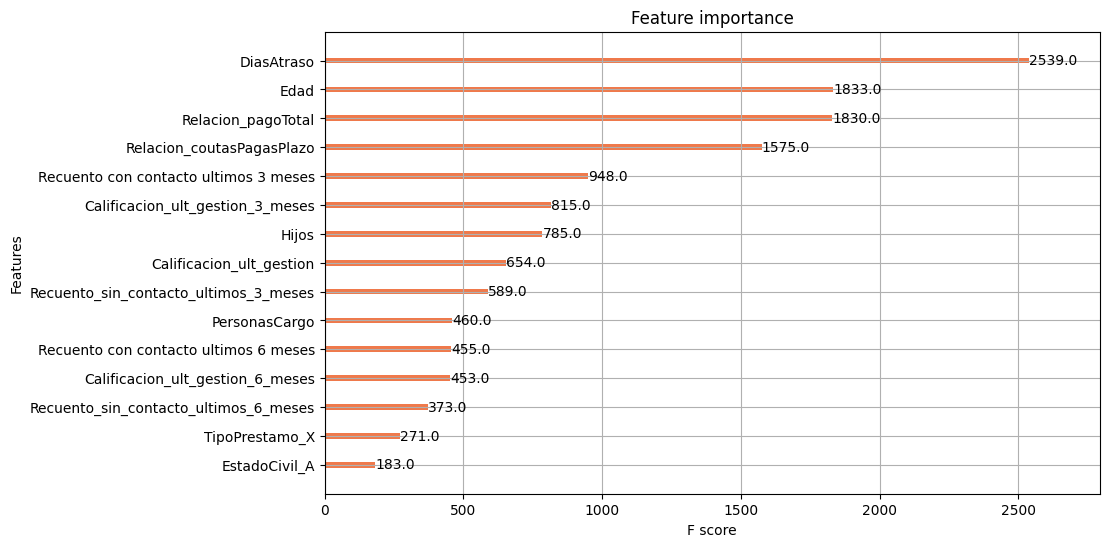

In [7]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Convertimos los datos en DMatrix, que es el formato que XGBoost usa internamente
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros del modelo XGBoost para regresión
params = {
    'objective': 'reg:squarederror',  # Objetivo para regresión
    'eval_metric': 'rmse',            # Métrica para evaluación: RMSE
    'max_depth': 6,                   # Profundidad máxima del árbol
    'eta': 0.05,                      # Tasa de aprendizaje
    'subsample': 0.9,                 # Fracción de muestras para entrenar
    'colsample_bytree': 0.8           # Fracción de características para cada árbol
}

# Entrenamos el modelo XGBoost
num_round = 300  # Número de iteraciones de entrenamiento
model = xgb.train(params, dtrain, num_round)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(dtest)

# Evaluamos el rendimiento del modelo utilizando varias métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos los resultados
print(f"RMSE en conjunto de prueba: {rmse:.4f}")
print(f"MAE en conjunto de prueba: {mae:.4f}")
print(f"R² en conjunto de prueba: {r2:.4f}")

# Obtenemos la importancia de las características
importance = model.get_score(importance_type='weight')  # Otras opciones: 'weight', 'gain', 'cover'

# Imprimimos las características más importantes
print("\nImportancia de las características:")
for feature, score in sorted(importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")

# Visualizamos la importancia de las características con color personalizado
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=15, ax=ax)

# Cambiar el color de las barras a #EF794B
for patch in ax.patches:
    patch.set_facecolor('#EF794B')

# Mostrar la gráfica
plt.show()

# selección de las variables más relevantes

In [11]:
importance = model.get_score(importance_type='weight')  # 'weight', 'gain', 'cover'

# Ordenamos las características por importancia (de mayor a menor)
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Extraemos solo las 15 características más importantes
top_15_features = [feature for feature, score in sorted_importance[:15]]

# Imprimimos las 15 características más importantes
print("\nLas 15 características más importantes son:")
for feature in top_15_features:
    print(feature)


x_reducido = X_encoded[top_15_features]


Las 15 características más importantes son:
DiasAtraso
Relacion_pagoTotal
Edad
Relacion_coutasPagasPlazo
Recuento con contacto ultimos 3 meses
Hijos
Calificacion_ult_gestion_3_meses
Recuento_sin_contacto_ultimos_3_meses
Calificacion_ult_gestion
PersonasCargo
Recuento con contacto ultimos 6 meses
Calificacion_ult_gestion_6_meses
Recuento_sin_contacto_ultimos_6_meses
TipoPrestamo_X
LocalizacionNegocio_I


In [12]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongo que ya tienes X_encoded y y preparados, si no, asegúrate de tenerlos.
# Ejemplo de preparación de datos (si es necesario)
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
# X_encoded = pd.DataFrame(X)  # Asegúrate de que tus datos estén en formato adecuado
# y = pd.Series(y)  # Esto es solo un ejemplo, usa tu conjunto de datos real

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_reducido, y, test_size=0.3, random_state=42)

# Convertimos los datos en DMatrix, que es el formato que XGBoost usa internamente
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros del modelo XGBoost para regresión
params = {
    'objective': 'reg:squarederror',  # Objetivo para regresión
    'eval_metric': 'rmse',            # Métrica para evaluación: RMSE
    'max_depth': 6,                   # Profundidad máxima del árbol
    'eta': 0.05,                      # Tasa de aprendizaje
    'subsample': 0.9,                 # Fracción de muestras para entrenar
    'colsample_bytree': 0.8         # Fracción de características para cada árbol
}

# Entrenamos el modelo XGBoost
num_round = 300 # Número de iteraciones de entrenamiento
model = xgb.train(params, dtrain, num_round)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(dtest)

# Evaluamos el rendimiento del modelo utilizando varias métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos los resultados
print(f"RMSE en conjunto de prueba: {rmse:.4f}")
print(f"MAE en conjunto de prueba: {mae:.4f}")
print(f"R² en conjunto de prueba: {r2:.4f}")

RMSE en conjunto de prueba: 0.2711
MAE en conjunto de prueba: 0.1548
R² en conjunto de prueba: 0.2628


# Predicción real

In [13]:
x_prediccion = pd.read_parquet('test_sep_2024F_cartera.parquet')
X_p = x_prediccion[['DiasAtraso','TipoPrestamo', 'Relacion_coutasPagasPlazo', 'Relacion_pagoTotal', 'Genero', 'TipoVivienda', 'LocalizacionNegocio', 'Edad', 'EstadoCivil', 'Hijos', 'PersonasCargo','Calificacion_ult_gestion',
         'Calificacion_ult_gestion_3_meses',
       'Calificacion_ult_gestion_6_meses', 'Recuento Incumplido 3 meses',
       'Recuento Incumplido 6 meses', 'Recuento con contacto ultimos 3 meses',
       'Recuento con contacto ultimos 6 meses',
       'Recuento_sin_contacto_ultimos_3_meses',
       'Recuento_sin_contacto_ultimos_6_meses']]
X_encoded_p = pd.get_dummies(X_p, columns=['TipoPrestamo', 'Genero', 'TipoVivienda', 'LocalizacionNegocio', 'EstadoCivil'], drop_first=True)

x_reducido_p = X_encoded_p[top_15_features]
# x_septiembre = x_prediccion

dtest_p = xgb.DMatrix(x_reducido_p)
y_pred_p = model.predict(dtest_p)


import pandas as pd

# Crear un nuevo DataFrame solo con las columnas 'NumeroObligacion' y 'y_pred_p'
df_resultado = pd.DataFrame({
    'NumeroObligacion': x_prediccion['Numero De Obligacion'],  # Asegúrate de que 'NumeroObligacion' esté en el DataFrame
    'Recuperacion': y_pred_p
})

# Guardar el nuevo DataFrame como archivo Excel
df_resultado.to_csv('Prediccion_Recuperacion.csv', index=False)

print("Archivo Excel guardado como 'predicciones_resultados.xlsx'")




Archivo Excel guardado como 'predicciones_resultados.xlsx'
